In [1]:
%matplotlib notebook

from rlsm.datasets.synthetic import generate_data
from rlsm.rlsm import initialize_parameters
from rlsm import ReciprocityLSM

In [81]:
Y, params = generate_data(n_nodes=100, density=0.2, odds_ratio=2, mu=1, random_state=1)

Z = params['Z']
print(params['recip_coef'], params['dist_coef'])

0.530068384026003 0.1287288640499049


In [82]:
from rlsm.gof import reciprocity

reciprocity(Y, is_adj=True)

Array(0.38663968, dtype=float32)

<IPython.core.display.Javascript object>


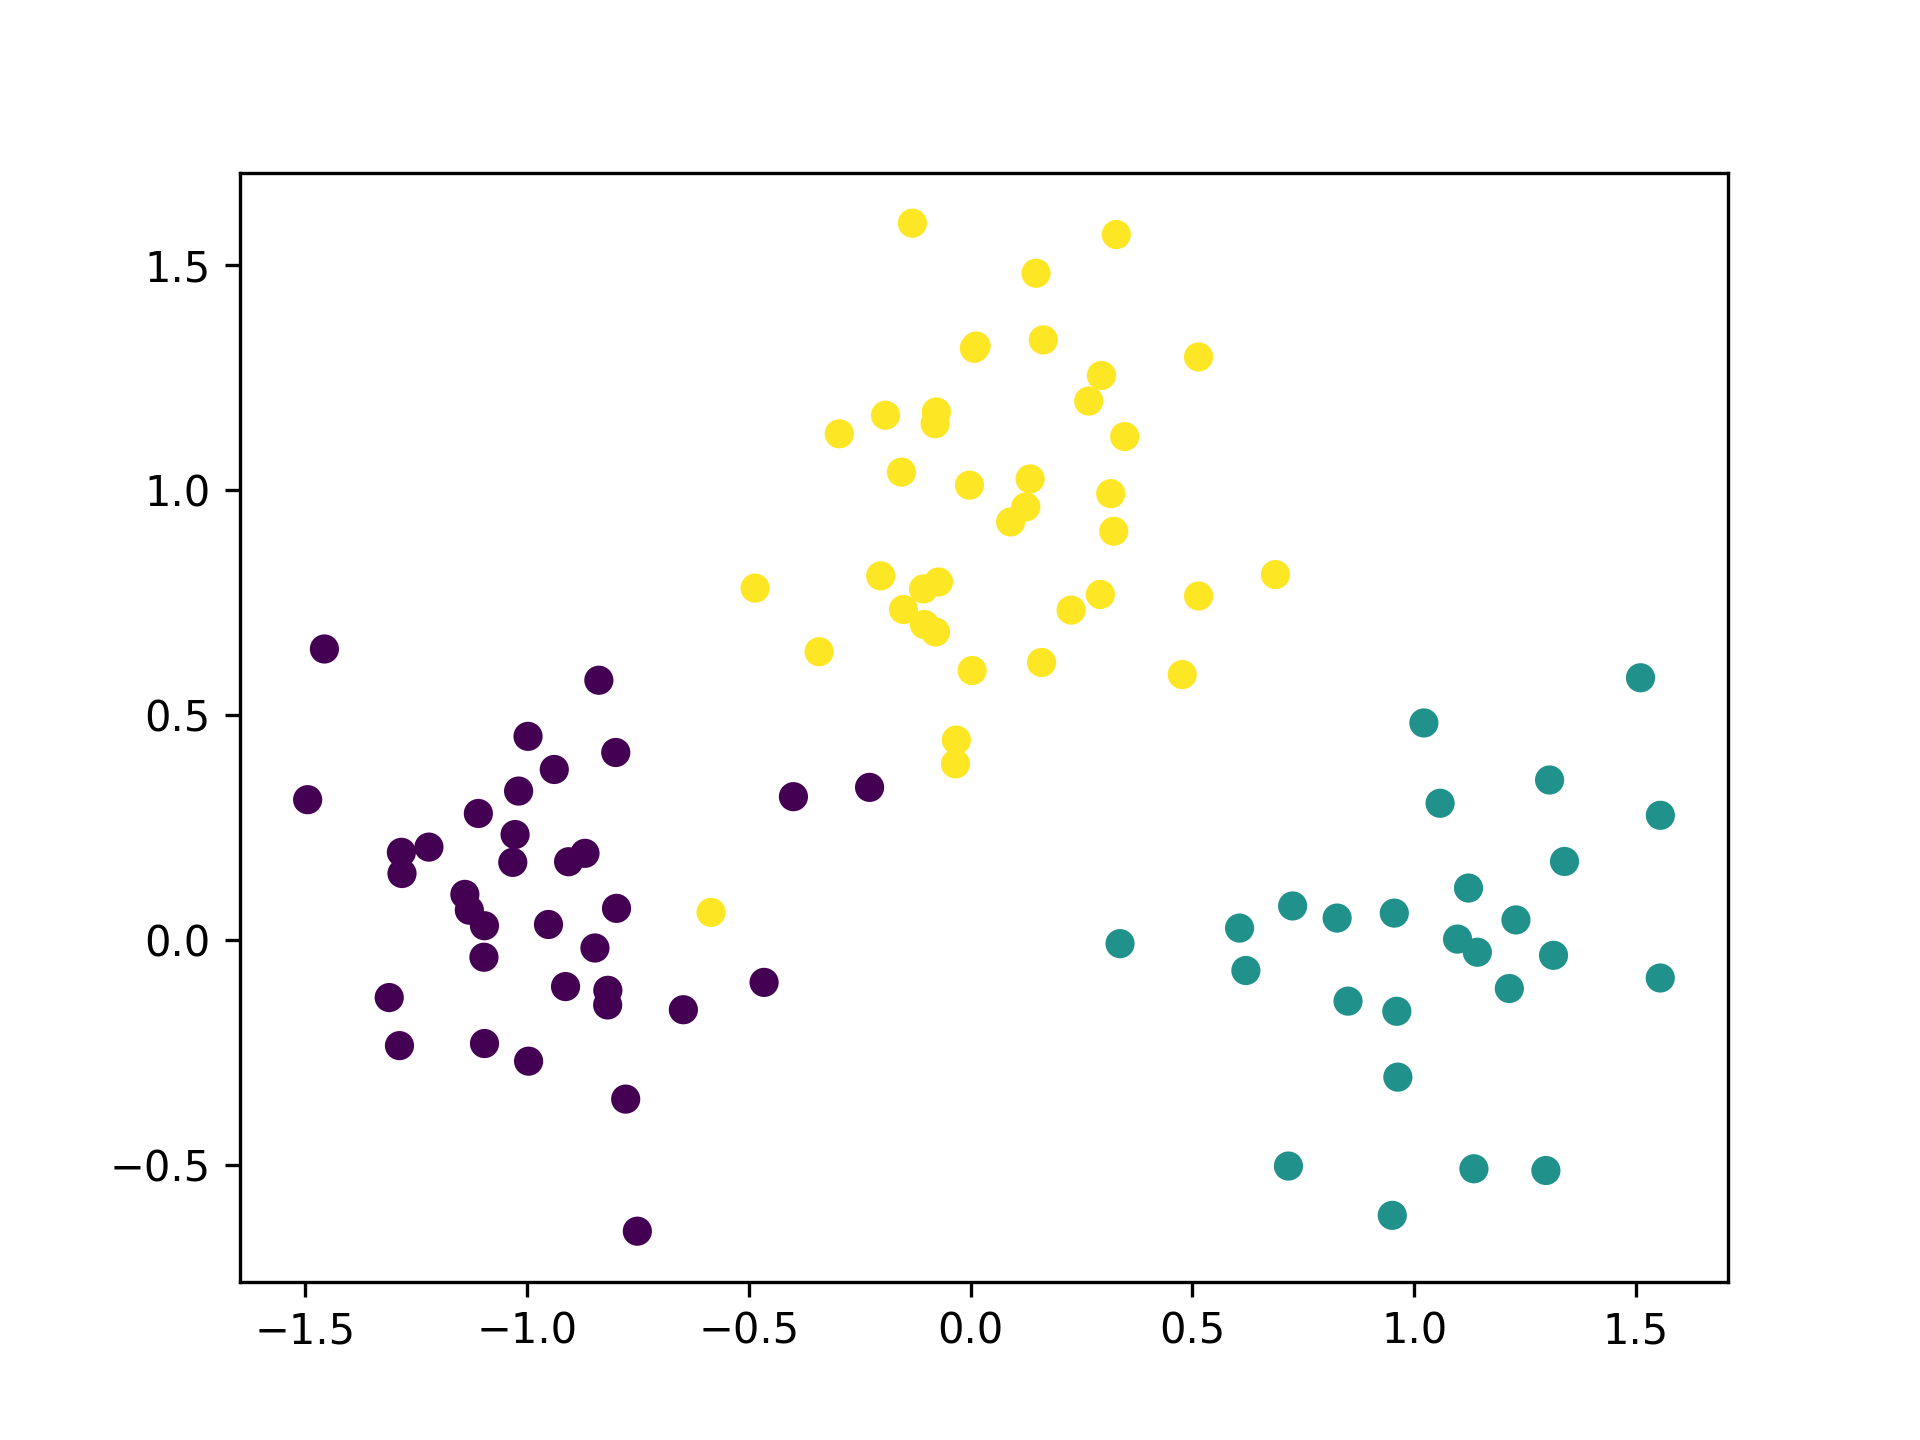

In [83]:
plt.scatter(Z[:, 0], Z[:, 1],c=params['c'])

<IPython.core.display.Javascript object>


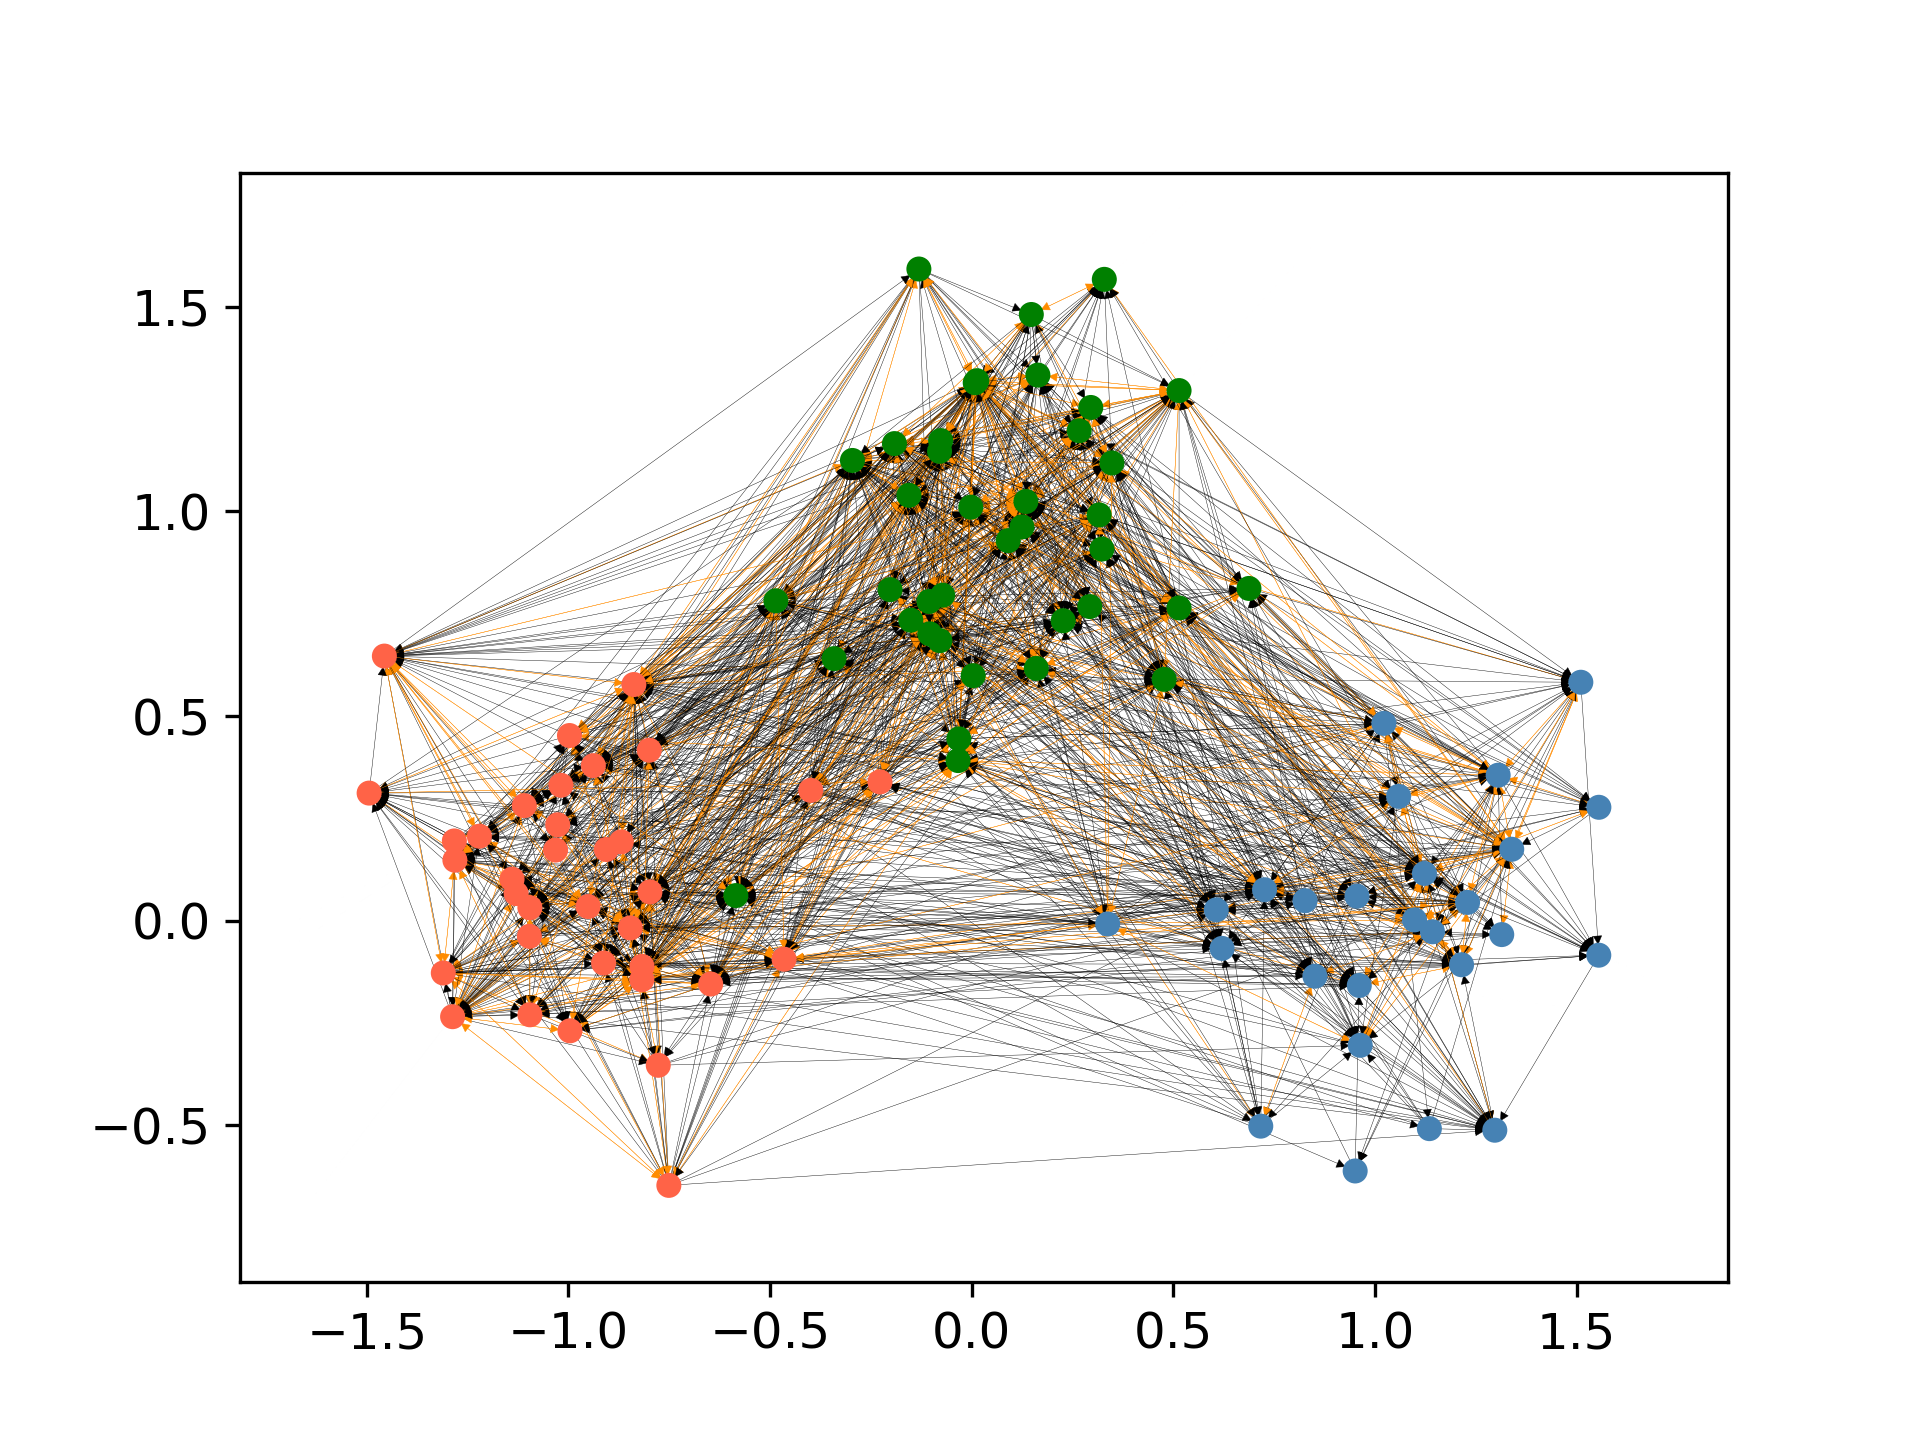

In [84]:
import networkx as nx

colors = np.asarray(["tomato", "steelblue", "green"])
#colors = np.asarray(["red", "cyan", "purple", "yellow","pink", 'orange'])
g = nx.from_numpy_array(Y, create_using=nx.DiGraph)
elist = list(nx.to_edgelist(g))
ecolor = ['darkorange' if Y[e[1], e[0]] else 'black' for e in elist]
pos = {k : Z[k] for k in range(Y.shape[0])}
nx.draw_networkx(g, pos, 
                 arrowsize=5,
                 node_color=colors[params['c']],
                 edge_color=ecolor, width=0.1, with_labels=False,
                 node_size=25)
plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True,
                labelsize=12)

In [85]:
model = ReciprocityLSM(n_features=2, reciprocity_type='distance', random_state=42)
model.sample(Y, n_warmup=2500, n_samples=5000)

sample: 100%|██████████████████████████████████████████████████████████████████████| 4000/4000 [08:29<00:00,  7.84it/s, 63 steps of size 9.11e-02. acc. prob=0.82]


In [86]:
model.print_summary()

AUC: 0.839, AIC: 8229.731, BIC:  10845.603, DIC: 7950.089, WAIC: 8049.680

                  mean       std    median      2.5%     97.5%     n_eff     r_hat
   dist_coef      0.04      0.16      0.05     -0.27      0.34   1132.76      1.00
       r_var      0.80      0.15      0.79      0.52      1.09    617.13      1.01
  recip_coef      0.53      0.22      0.53      0.11      0.95   1173.26      1.00
       s_var      0.63      0.12      0.62      0.41      0.87    638.83      1.00
     sr_corr      0.52      0.15      0.52      0.21      0.81    398.53      1.00
       z_var      0.83      0.14      0.83      0.58      1.12    803.21      1.00

Number of divergences: 17


In [87]:
print(params['recip_coef'], params['dist_coef'])

0.530068384026003 0.1287288640499049


<IPython.core.display.Javascript object>


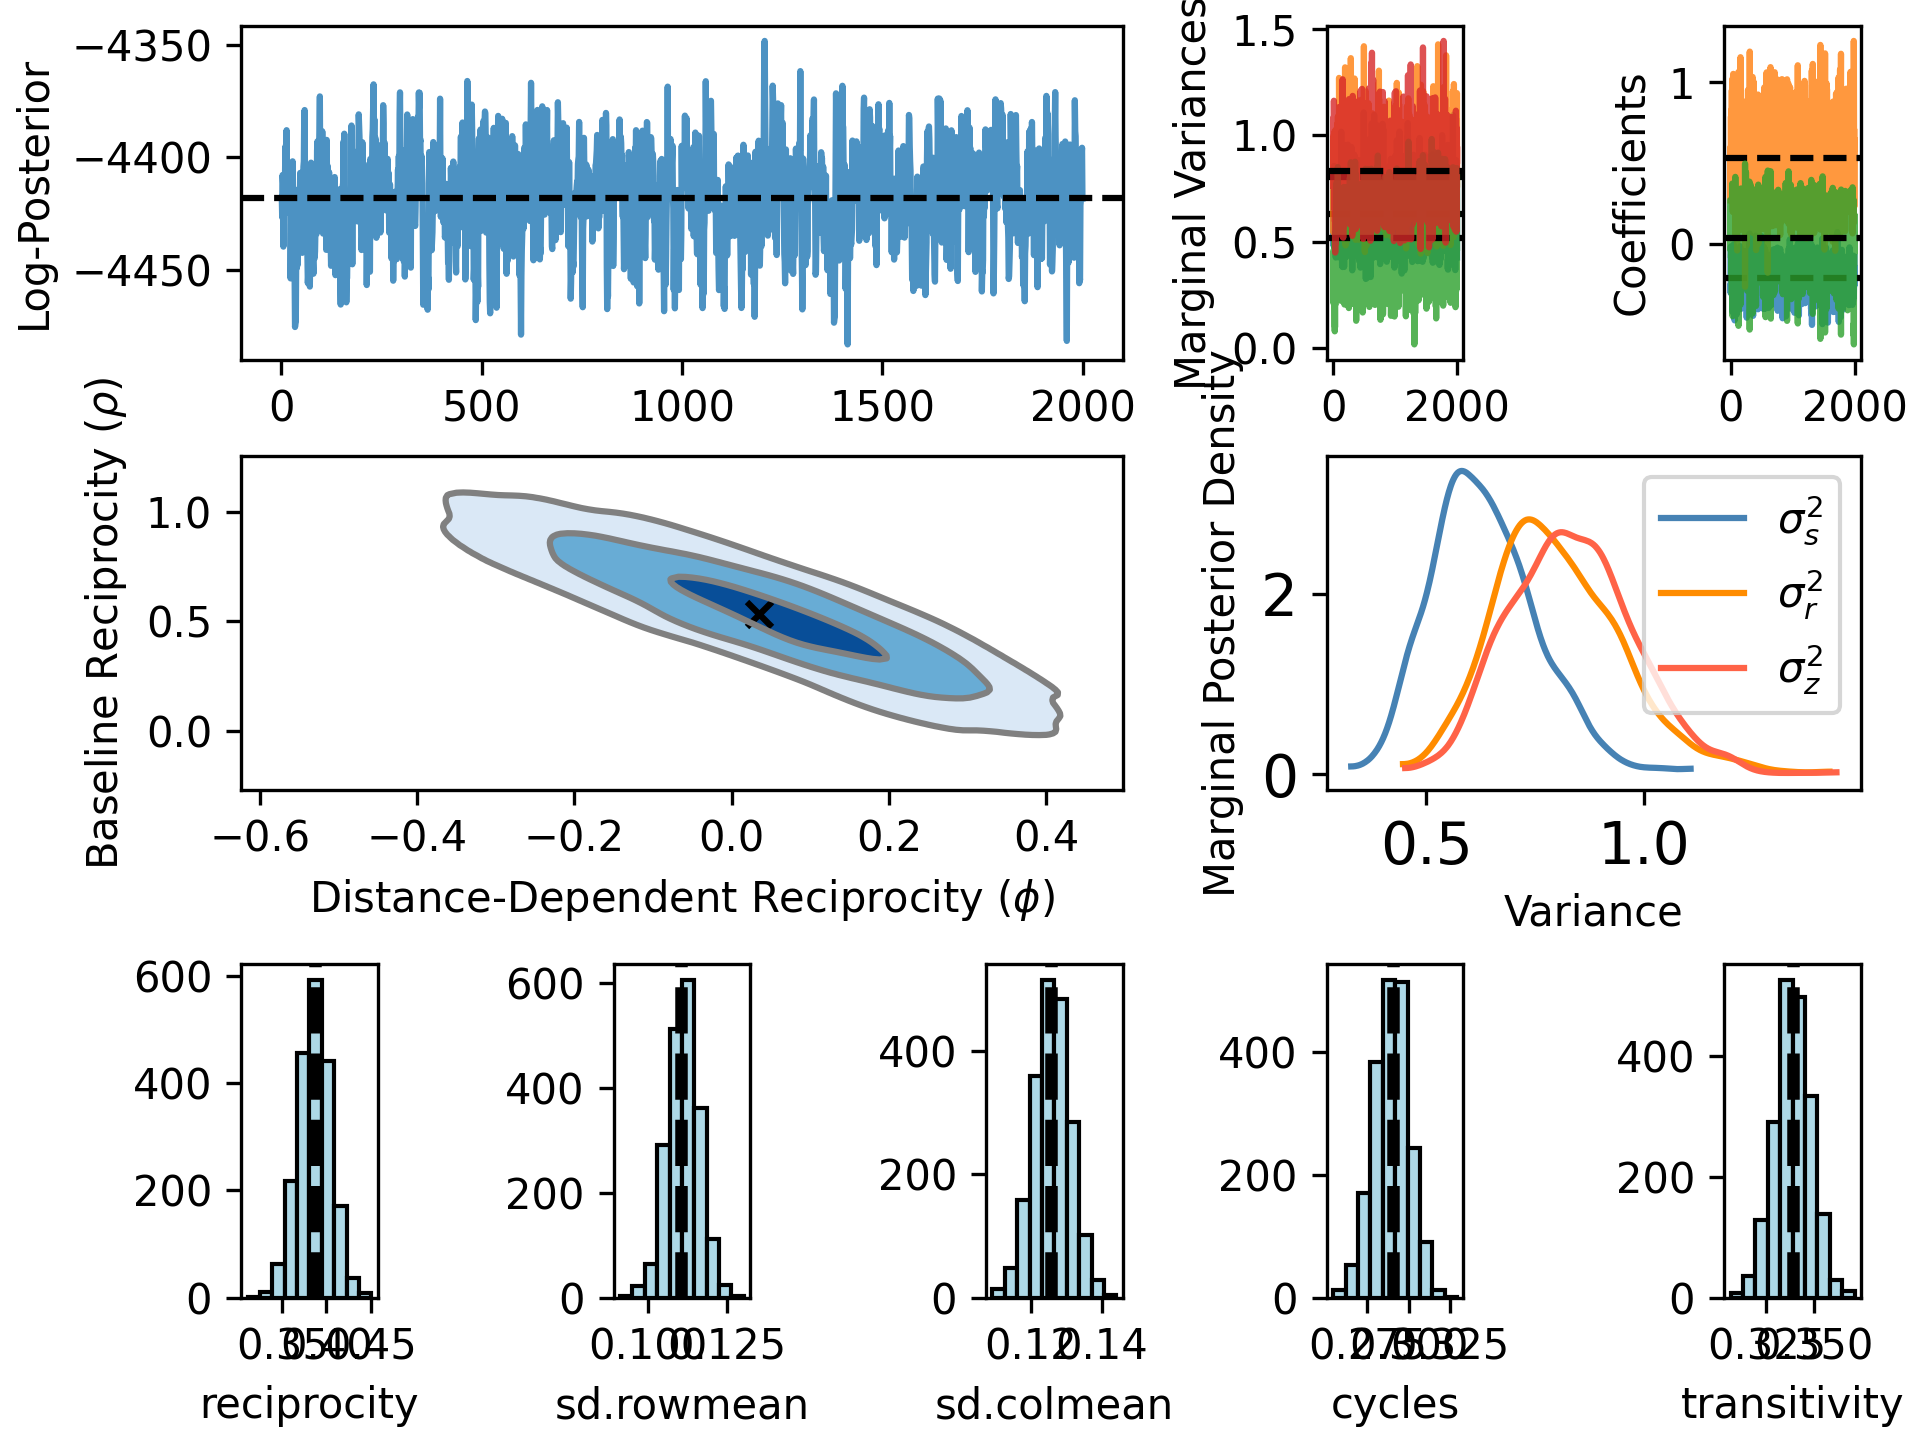

{'A': <Axes: label='A', ylabel='Log-Posterior'>,
 'B': <Axes: label='B', ylabel='Marginal Variances'>,
 'C': <Axes: label='C', ylabel='Coefficients'>,
 'D': <Axes: label='D', xlabel='Distance-Dependent Reciprocity ($\\phi$)', ylabel='Baseline Reciprocity ($\\rho$)'>,
 'E': <Axes: label='E', xlabel='Variance', ylabel='Marginal Posterior Density'>,
 'F': <Axes: label='F', xlabel='reciprocity'>,
 'G': <Axes: label='G', xlabel='sd.rowmean'>,
 'H': <Axes: label='H', xlabel='sd.colmean'>,
 'I': <Axes: label='I', xlabel='cycles'>,
 'J': <Axes: label='J', xlabel='transitivity'>}

In [88]:
model.plot()

## MSE Latent Space

0.48033828786639376


<IPython.core.display.Javascript object>


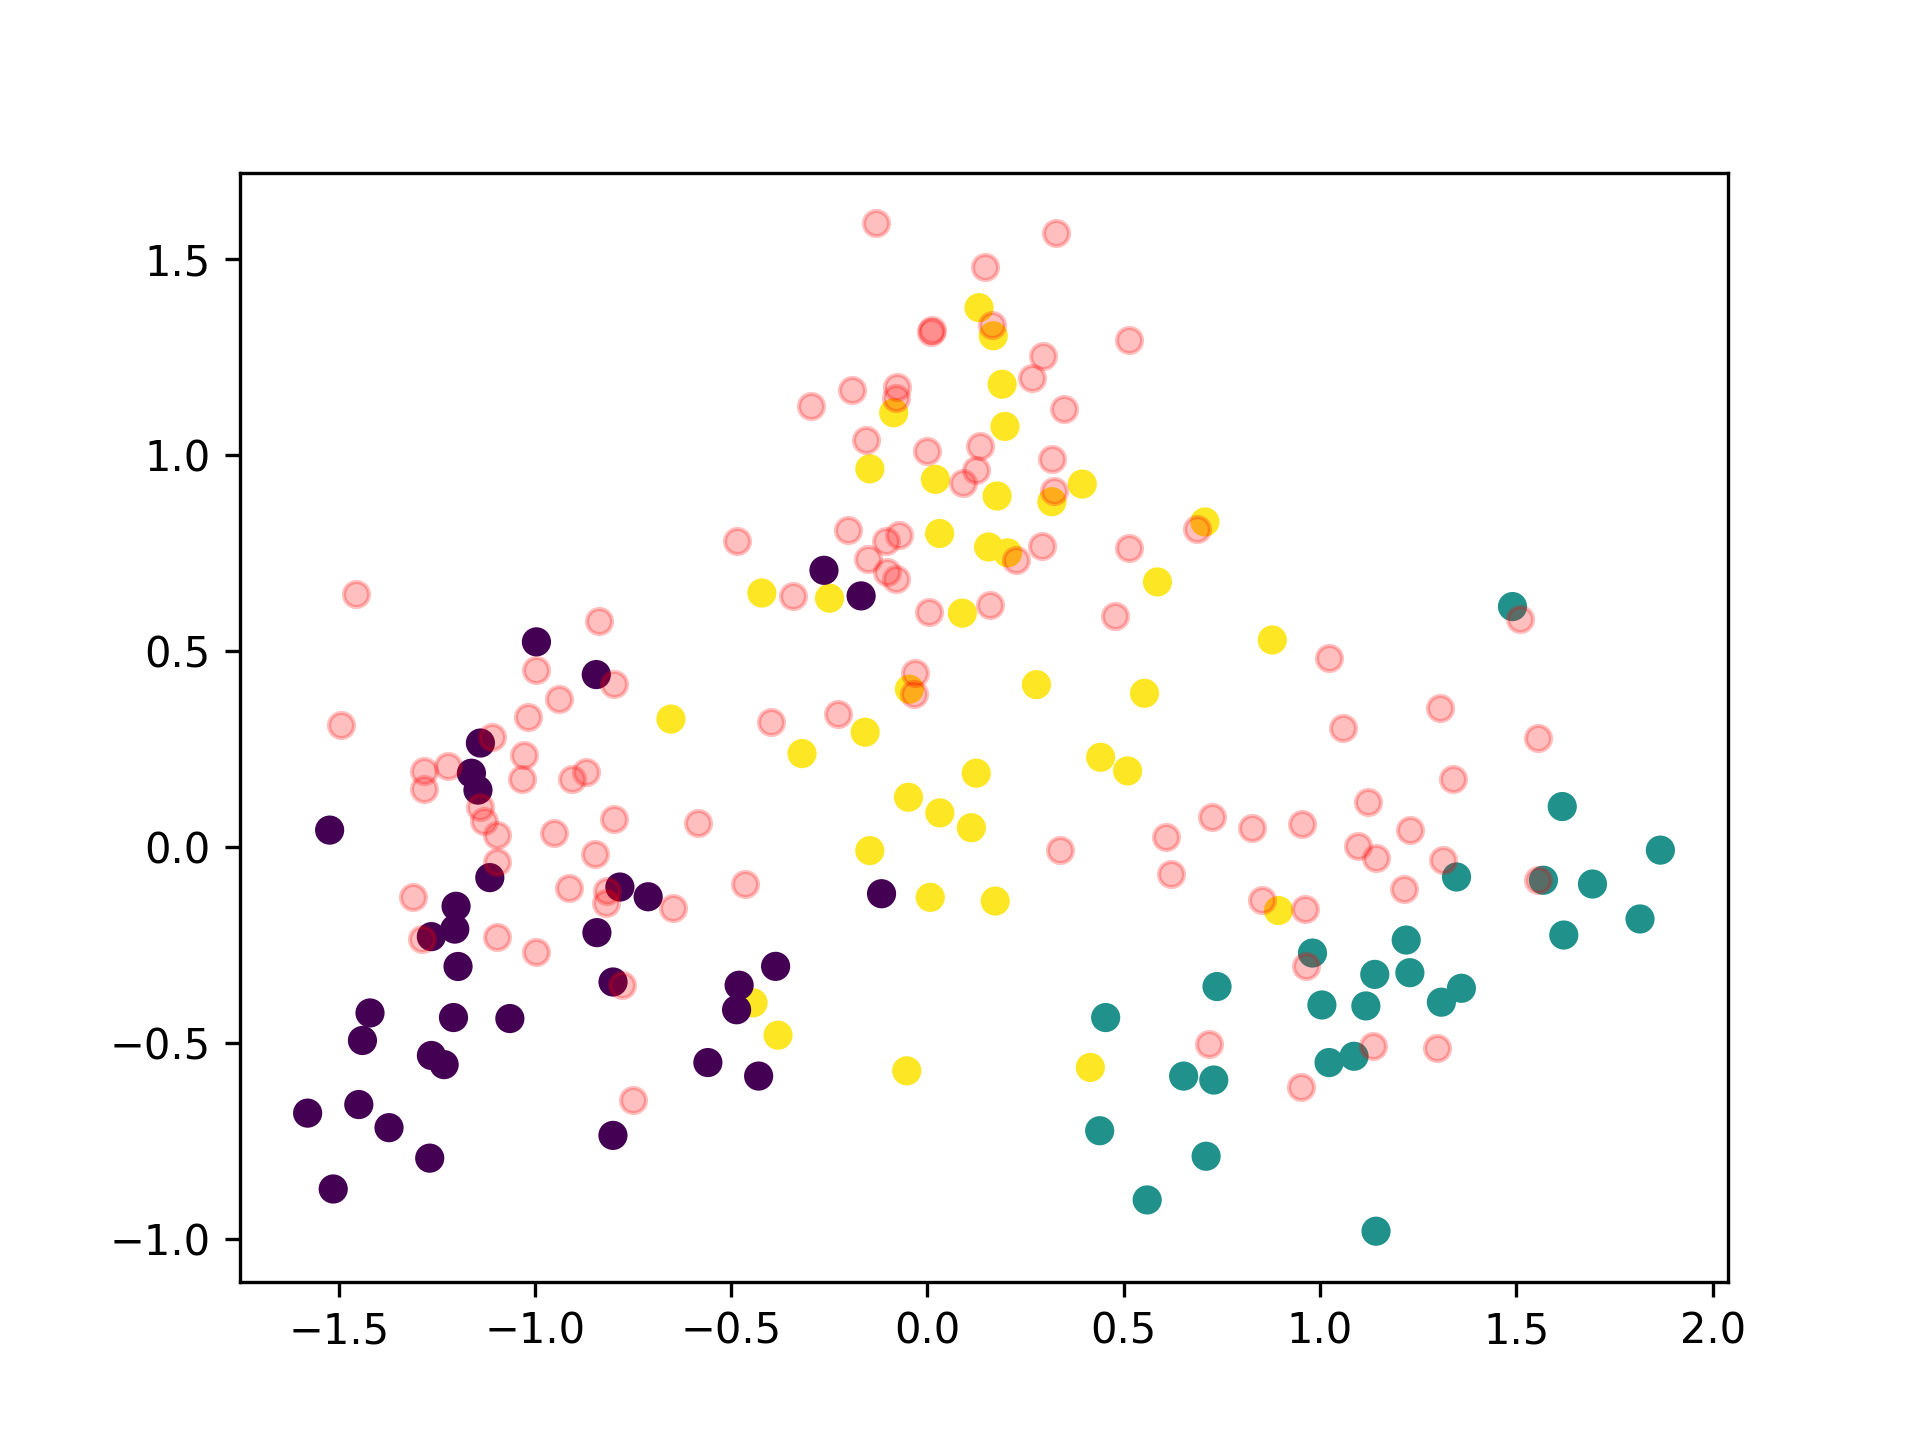

In [89]:
from scipy.linalg import orthogonal_procrustes

# MSE for latent position estimates
R, _ = orthogonal_procrustes(model.Z_, Z)
U_est = model.Z_ @ R
print(np.sqrt(np.mean((U_est - Z) ** 2)))

plt.scatter(U_est[:, 0], U_est[:, 1], c=params['c'])
plt.scatter(Z[:, 0], Z[:,1], alpha=0.25, c='red')

## MSE and PC (Sender Effects)

In [90]:
np.corrcoef(model.s_, params['s'].ravel())[0,1]

0.9248776063454811

In [91]:
np.mean((model.s_ - params['s'].ravel()) ** 2)

0.10516722277680136

## MSE and PC (reciever effects)

In [92]:
np.corrcoef(model.r_, params['r'].ravel())[0,1]

0.9165322680863802

In [93]:
np.mean((model.r_ - params['r'].ravel()) ** 2)

0.14551378050790192

## MSE for $\phi$ and $\rho$

In [94]:
np.abs(model.dist_coef_ - params['dist_coef'])

0.09351675704716977

In [95]:
np.abs(model.recip_coef_ - params['recip_coef'])

0.0036488906398295384